 Problem Statement:
 Given data about COVID-19 patients, write code to visualize the impact and
 analyze the trend of rate of infection and recovery as well as make predictions
 about the number of cases expected a week in future based on the current
 trends.

 Dataset:
 CSV and Excel files containing data about the number of COVID-19 confirmed
 deaths and recovered patients both around the world and in India.

 Guidelines:
 ● Usepandas to accumulate data from multiple data files.
 ● Useplotly (visualization library) to create interactive visualizations.
 ● UseFacebook prophet library to make time series models.
 ● Visualize the prediction by combining these technologies.



Import required libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
from prophet import Prophet
from prophet.plot import plot_plotly
import glob
import zipfile
import os


In [4]:
df = pd.read_csv("covid_19_clean_complete.csv")

In [5]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [7]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [8]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [9]:
num_df = df.select_dtypes(include = 'number')

In [10]:
df_corr = num_df.corr()


In [11]:
df_corr

,Lat,Long,Confirmed,Deaths,Recovered,Active
Lat,1.000000,-0.127259,0.036665,0.070040,0.015329,0.044392
Long,-0.127259,1.000000,-0.078911,-0.101340,-0.052391,-0.085688
Confirmed,0.036665,-0.078911,1.000000,0.912361,0.895506,0.950255
Deaths,0.070040,-0.101340,0.912361,1.000000,0.763090,0.891858
Recovered,0.015329,-0.052391,0.895506,0.763090,1.000000,0.713088
Active,0.044392,-0.085688,0.950255,0.891858,0.713088,1.000000


Creating heatmap to understand better about correlation among features

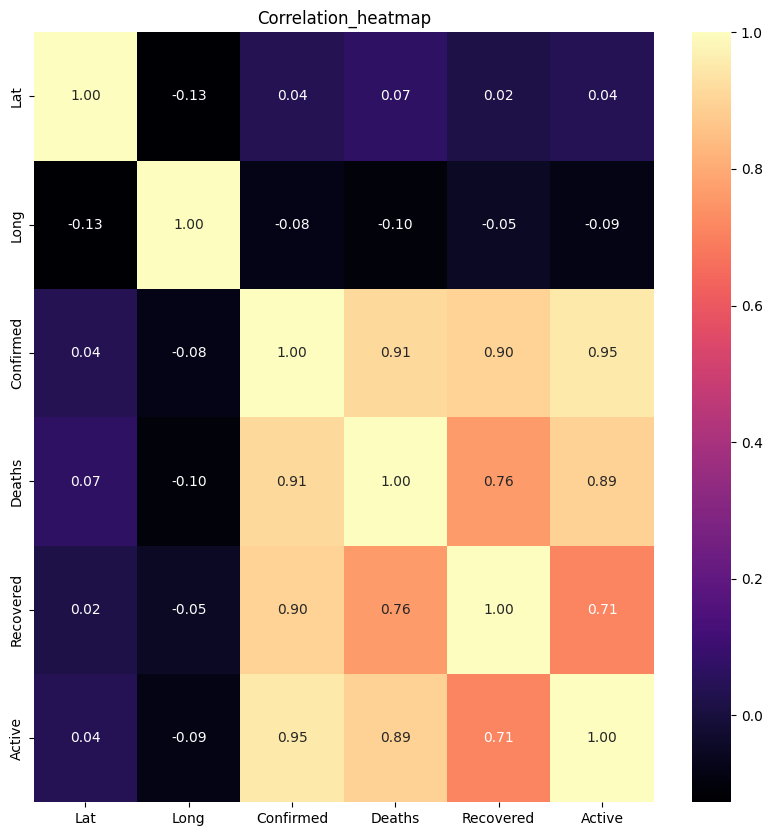

In [12]:
plt.figure(figsize = (10, 10))
sns.heatmap(df_corr, annot = True, fmt = '.2f', cmap = 'magma')
plt.title('Correlation_heatmap')
plt.show()

Inference from above heatmap and correlation matrics is that columns : Confirmed, Deaths, Recovered and Active are highly correlated.

In [13]:
num_df.columns

Index(['Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered', 'Active'], dtype='object')

Heatmap using plotly.express

In [ ]:

# Creating a heatmap using the correlation matrix
fig = px.imshow(
    df_corr,
    title='Correlation Heatmap',
    labels={'color': 'Correlation'},
    color_continuous_scale='RdBu'
)

# Adding annotations
annotations = []
for i in range(len(df_corr)):
    for j in range(len(df_corr.columns)):
        annotations.append(
            go.layout.Annotation(
                text=str(round(df_corr.iloc[i, j], 2)),
                x=j,
                y=i,
                showarrow=False,
                font=dict(color='black')
            )
        )

# Customizing the layout
fig.update_layout(
    title_font_size=20,
    title_x=0.5,
    width=750,
    height=550,
    margin=dict(l=40, r=40, t=40, b=40),
    coloraxis_colorbar=dict(
        title='Correlation',
        titleside='right',
        ticks='outside'
    ),
    annotations=annotations
)

# Displaying the heatmap
fig.show()


Data cleaning, EDA and Feature Engineering

In [15]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


Data cleaning and Preprocessing

In [16]:
df.rename(columns={'Country/Region': 'country', 'Province/State': 'state', 'WHO Region': 'region'}, inplace=True)


In [17]:
df['Date'].dtypes

dtype('O')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      14664 non-null  object 
 1   country    49068 non-null  object 
 2   Lat        49068 non-null  float64
 3   Long       49068 non-null  float64
 4   Date       49068 non-null  object 
 5   Confirmed  49068 non-null  int64  
 6   Deaths     49068 non-null  int64  
 7   Recovered  49068 non-null  int64  
 8   Active     49068 non-null  int64  
 9   region     49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [19]:
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
df['Date'].dtypes

dtype('<M8[ns]')

In [21]:
df.head()

,state,country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


Features Selection

Selecting features for data analysis

In [22]:
df2 = df.groupby('Date').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()



In [23]:
df2

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,555,17,28
1,2020-01-23,654,18,30
2,2020-01-24,941,26,36
3,2020-01-25,1434,42,39
4,2020-01-26,2118,56,52
...,...,...,...,...
183,2020-07-23,15510481,633506,8710969
184,2020-07-24,15791645,639650,8939705
185,2020-07-25,16047190,644517,9158743
186,2020-07-26,16251796,648621,9293464


In [29]:
df2['Active'] = df2['Confirmed'] - df2['Deaths'] - df2['Recovered']


In [30]:
df2 = df2.sort_values('Date')

In [31]:
df2

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010
...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711


Interactive Visualization

In [32]:
india_indices = df[df['country'] == 'India'].index
print(india_indices)


Index([  129,   390,   651,   912,  1173,  1434,  1695,  1956,  2217,  2478,
       ...
       46587, 46848, 47109, 47370, 47631, 47892, 48153, 48414, 48675, 48936],
      dtype='int64', length=188)


In [33]:
india_indices.shape

(188,)

Ploting Visualization

In [34]:
country = india_indices[0]

fig = px.line(df2, x='Date', y=['Confirmed', 'Active', 'Recovered', 'Deaths'],
                         title=f'COVID-19 Cases in {country}',
                         labels={'value': 'Count', 'variable': 'Case Type'})
fig.show()

In [35]:
country = 'India'

fig = px.line(df2, x='Date', y=['Confirmed', 'Active', 'Recovered', 'Deaths'],
                         title=f'COVID-19 Cases in {country}',
                         labels={'value': 'Count', 'variable': 'Case Type'})
fig.show()

Select country for ploting using reverse indexing

In [36]:
country = df['country'].unique()[-1]

fig = px.line(df2, x='Date', y=['Confirmed', 'Active', 'Recovered', 'Deaths'],
                         title=f'COVID-19 Cases in {country}',
                         labels={'value': 'Count', 'variable': 'Case Type'})
fig.show()

In [37]:
fig = px.line(
    df2,
    x='Date',
    y=['Confirmed', 'Active', 'Recovered', 'Deaths'],
    title=f'COVID-19 Cases in {df["country"].unique()[100]}',
    labels={'value': 'Count', 'variable': 'Case Type'}
)
fig.show()


Individual column wise updates

Creating Daily Patients Update

In [38]:
df2['New_Confirmed'] = df2['Confirmed'].diff().fillna(0)
df2['New_Recovered'] = df2['Recovered'].diff().fillna(0)
df2['New_Deaths'] = df2['Deaths'].diff().fillna(0)

OR

Updates using for loop

In [39]:
columns = ['Confirmed', 'Recovered', 'Deaths']
new_columns = ['New_Confirmed', 'New_Recovered', 'New_Deaths']

for old_col, new_col in zip(columns, new_columns):
    df2[new_col] = df2[old_col].diff().fillna(0)


In [40]:
df2.head()

,Date,Confirmed,Deaths,Recovered,Active,New_Confirmed,New_Recovered,New_Deaths
0,2020-01-22,555,17,28,510,0.0,0.0,0.0
1,2020-01-23,654,18,30,606,99.0,2.0,1.0
2,2020-01-24,941,26,36,879,287.0,6.0,8.0
3,2020-01-25,1434,42,39,1353,493.0,3.0,16.0
4,2020-01-26,2118,56,52,2010,684.0,13.0,14.0


Ploting daily updates

In [41]:
country = 'India'

fig = px.line(df2, x='Date', y=['New_Confirmed', 'New_Recovered', 'New_Deaths'],
                         title=f'Daily COVID-19 Changes in {country}',
                         labels={'value': 'Count', 'variable': 'Change Type'})
fig.show()

Time series Prediction and Forecast for Confirmed cases

In [42]:
prophet_df = df2[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})


In [52]:
model = Prophet()

In [53]:
model.fit(prophet_df)

20:29:55 - cmdstanpy - INFO - Chain [1] start processing
20:29:55 - cmdstanpy - INFO - Chain [1] done processing


Creating weekly prediction

In [54]:
future = model.make_future_dataframe(periods=7)

In [55]:
forecast = model.predict(future)


In [57]:
forecast[:5]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9356.185581,-122412.450567,82204.705476,-9356.185581,-9356.185581,-10986.210444,-10986.210444,-10986.210444,-10986.210444,-10986.210444,-10986.210444,0.0,0.0,0.0,-20342.396024
1,2020-01-23,-6667.733757,-107501.539151,99667.186047,-6667.733757,-6667.733757,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,0.0,0.0,0.0,-7746.625412
2,2020-01-24,-3979.281934,-110450.583449,115490.081547,-3979.281934,-3979.281934,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,0.0,0.0,0.0,6123.967440
3,2020-01-25,-1290.830110,-91216.636663,122355.272391,-1290.830110,-1290.830110,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,0.0,0.0,0.0,12379.384088
4,2020-01-26,1397.621714,-102210.139416,118469.814332,1397.621714,1397.621714,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,0.0,0.0,0.0,8615.766111


In [58]:
fig_forecast = plot_plotly(model, forecast)
fig_forecast.update_layout(title_text=f'COVID-19 Confirmed Cases Forecast for {country}')
fig_forecast.show()

Upgraded Plot

In [59]:

# Plotting the forecast using Plotly
fig_forecast = plot_plotly(model, forecast)

# Updating layout with more customization
fig_forecast.update_layout(
    title_text=f'COVID-19 Confirmed Cases Forecast for {country}',
    title_font_size=24,
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Confirmed Cases',
    legend_title_text='Legend',
    width=1000,
    height=600,
    margin=dict(l=40, r=40, t=40, b=40),
    template='plotly_white'
)

# Adding annotations for better readability
annotations = []
for i in range(len(forecast)):
    if forecast['yhat'][i] > 0:
        annotations.append(
            go.layout.Annotation(
                x=forecast['ds'][i],
                y=forecast['yhat'][i],
                text=f"{round(forecast['yhat'][i], 0)}",
                showarrow=True,
                arrowhead=2,
                ax=20,
                ay=-30,
                font=dict(size=10, color='blue')
            )
        )

fig_forecast.update_layout(annotations=annotations)

# Displaying the forecast plot
fig_forecast.show()


Time series forecast for Recovered cases

In [60]:

prophet_recovered_df = df2[['Date', 'Recovered']].rename(columns={'Date': 'ds', 'Recovered': 'y'})
model_recovered = Prophet()
model_recovered.fit(prophet_recovered_df)
future_recovered = model_recovered.make_future_dataframe(periods=7)
forecast_recovered = model_recovered.predict(future_recovered)

fig_forecast_recovered = plot_plotly(model_recovered, forecast_recovered)
fig_forecast_recovered.update_layout(title_text=f'COVID-19 Recovered Cases Forecast for {country}')
fig_forecast_recovered.show()

20:30:32 - cmdstanpy - INFO - Chain [1] start processing
20:30:32 - cmdstanpy - INFO - Chain [1] done processing


Alternative Analysis

Defining data analysis function method for forecasting

In [61]:

def analyze_covid_data(zipfile_path, country='India'):
    """
    Analyzes COVID-19 data, visualizes trends, and makes predictions.

    Args:
        zipfile_path (str): Path to the zip file containing COVID-19 data files.
        country (str): Country to analyze (default is 'India').
    """

    # 1. Extract the zip file contents
    with zipfile.ZipFile(zipfile_path, 'r') as zip_ref:
        zip_ref.extractall("/tmp/covid_data")

    extracted_folder = "/tmp/covid_data"

    # 2. Accumulate Data from Multiple Files
    all_files = glob.glob(extracted_folder + "/*.csv") + glob.glob(extracted_folder + "/*.xlsx")
    li = []

    for filename in all_files:
        if filename.endswith(".csv"):
            df = pd.read_csv(filename)
        else:
            df = pd.read_excel(filename)

        li.append(df)

    df = pd.concat(li, axis=0, ignore_index=True)

    # 3. Data Cleaning and Preprocessing
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
    elif 'date' in df.columns:
        df['Date'] = pd.to_datetime(df['date'])
    else:
        print("Error: Date column not found.")
        return

    df = df.rename(columns={'Confirmed': 'Confirmed', 'Deaths': 'Deaths', 'Recovered': 'Recovered'})

    if country:
        df = df[df['Country/Region'] == country]

    df = df.groupby('Date').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()

    df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
    df = df.sort_values('Date')

    # 4. Interactive Visualizations with Plotly
    fig_cases = px.line(df, x='Date', y=['Confirmed', 'Active', 'Recovered', 'Deaths'],
                         title=f'COVID-19 Cases in {country}',
                         labels={'value': 'Count', 'variable': 'Case Type'})
    fig_cases.show()

    # Calculate daily changes
    df['New Confirmed'] = df['Confirmed'].diff().fillna(0)
    df['New Recovered'] = df['Recovered'].diff().fillna(0)
    df['New Deaths'] = df['Deaths'].diff().fillna(0)

    fig_daily = px.line(df, x='Date', y=['New Confirmed', 'New Recovered', 'New Deaths'],
                         title=f'Daily COVID-19 Changes in {country}',
                         labels={'value': 'Count', 'variable': 'Change Type'})
    fig_daily.show()

    # 5. Time Series Prediction with Facebook Prophet
    prophet_df = df[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})
    model = Prophet()
    model.fit(prophet_df)
    future = model.make_future_dataframe(periods=7)  # Predict 7 days into the future
    forecast = model.predict(future)

    fig_forecast = plot_plotly(model, forecast)
    fig_forecast.update_layout(title_text=f'COVID-19 Confirmed Cases Forecast for {country}')
    fig_forecast.show()

    # Optionally, forecast Recovered cases
    prophet_recovered_df = df[['Date', 'Recovered']].rename(columns={'Date': 'ds', 'Recovered': 'y'})
    model_recovered = Prophet()
    model_recovered.fit(prophet_recovered_df)
    future_recovered = model_recovered.make_future_dataframe(periods=7)
    forecast_recovered = model_recovered.predict(future_recovered)

    fig_forecast_recovered = plot_plotly(model_recovered, forecast_recovered)
    fig_forecast_recovered.update_layout(title_text=f'COVID-19 Recovered Cases Forecast for {country}')
    fig_forecast_recovered.show()

# Example Usage
zipfile_path = "covid_19_clean_complete-1.zip"
analyze_covid_data(zipfile_path, country='India')

20:30:45 - cmdstanpy - INFO - Chain [1] start processing
20:30:45 - cmdstanpy - INFO - Chain [1] done processing


20:30:45 - cmdstanpy - INFO - Chain [1] start processing
20:30:45 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
df.columns

Index(['state', 'country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'region'],
      dtype='object')

In [ ]:
df['Country/Region'].unique()

Analysis for more countries

Analysis for more than one country using for loop

In [49]:
countries = ['India','United Kingdom', 'Uruguay', 'US', 'Uzbekistan', 'Venezuela']

for country in countries:
  analyze_covid_data(zipfile_path, country = country )


NameError: name 'Prophet' is not defined